In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
plant_gen = pd.read_csv('../data/Plant_1_Generation_Data.csv')
plant_weat = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

# Convert DATR_TIME from string to datetime
plant_gen['DATE_TIME'] = pd.to_datetime(plant_gen['DATE_TIME'], format='%Y-%m-%d %H:%M')
plant_weat['DATE_TIME'] = pd.to_datetime(plant_weat['DATE_TIME'], format='%Y-%m-%d %H:%M')


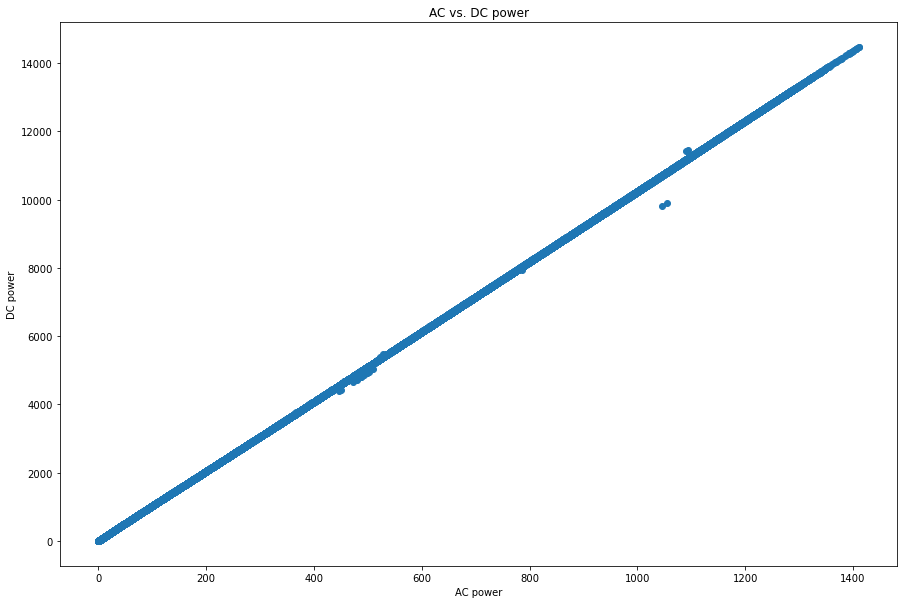

In [3]:
plt.figure(figsize=(15, 10))
plt.scatter(plant_gen['AC_POWER'],plant_gen['DC_POWER'])
plt.xlabel('AC power')
plt.ylabel('DC power')
plt.title('AC vs. DC power')
coeff = np.polyfit(plant_gen['AC_POWER'],plant_gen['DC_POWER'],1)


In [12]:
residual = (plant_gen['DC_POWER']-coeff[0]*plant_gen['AC_POWER'] -coeff[1])**2 # or we can take the absolute value
residual = pd.DataFrame(residual)
plant_gen['AC/DC_residual'] = residual
plant_gen["AC/DC_conversion"]=plant_gen["AC_POWER"]/plant_gen["DC_POWER"]


In [21]:
plant_gen['AC/DC_residual'].mean()+plant_gen['AC/DC_residual'].std()

4412.321519990385

In [26]:
heighst_residuals = plant_gen[(plant_gen['AC/DC_residual']<=4400)&(plant_gen['AC/DC_residual']>=1000)] # pick whatever number you wish
heighst_residuals.sort_values('AC/DC_residual')


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,AC/DC_conversion
59314,2020-06-13 11:45:00,4135001,wCURE6d3bPkepu2,13522.428570,1318.442857,3777.000000,6997685.000,1000.296924,0.097500
59317,2020-06-13 11:45:00,4135001,zVJPv84UY57bAof,13402.000000,1306.675000,3758.125000,7332308.125,1000.886222,0.097499
32026,2020-05-31 11:30:00,4135001,ZnxXDlPa8U1GXgE,13478.000000,1314.100000,2909.000000,6646292.000,1001.455368,0.097500
30011,2020-05-30 12:30:00,4135001,uHbuxQJl8lW7ozc,13508.428570,1317.071429,3163.571429,7155095.571,1002.565963,0.097500
12091,2020-05-21 11:15:00,4135001,ZoEaEvLYb1n2sOq,13570.000000,1323.087500,2933.750000,7142001.750,1002.570898,0.097501
...,...,...,...,...,...,...,...,...,...
61618,2020-06-14 14:00:00,4135001,iCRJl6heRkivqQ3,14436.285710,1407.542857,5267.000000,7405122.000,1128.458456,0.097500
61613,2020-06-14 14:00:00,4135001,YxYtjZvoooNbGkE,14466.857140,1410.528571,5160.857143,7404599.857,1129.412880,0.097501
40560,2020-06-04 13:00:00,4135001,adLQvlD726eNBSB,14413.428570,1405.300000,4762.857143,6427029.857,1135.007239,0.097499
24675,2020-05-27 14:45:00,4135001,VHMLBKoKgIrUVDU,5388.714286,522.562500,5473.625000,7303088.625,1877.831673,0.096974


In [31]:
heighst_residuals1 = plant_gen[(plant_gen['AC/DC_residual']<=1000)] # pick whatever number you wish
heighst_residuals1.sort_values('AC/DC_residual')

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,AC/DC_conversion
52931,2020-06-10 11:15:00,4135001,rGa61gmuvPhdLxV,8748.142857,855.042857,2260.857143,7306464.857,4.803386e-07,0.097740
18305,2020-05-24 13:15:00,4135001,bvBOhCH3iADSZry,10822.750000,1057.750000,4971.000000,6381743.000,1.990001e-05,0.097734
29513,2020-05-30 07:00:00,4135001,7JYdWkrLSPkdwr4,1689.428571,165.342857,74.428571,7714909.429,2.661989e-05,0.097869
29523,2020-05-30 07:00:00,4135001,ih0vzX44oOqAx2f,1695.375000,165.925000,75.250000,6295196.250,4.020593e-05,0.097869
35841,2020-06-02 07:00:00,4135001,1IF53ai7Xc0U56Y,1700.875000,166.462500,63.750000,6317507.750,5.436490e-05,0.097869
...,...,...,...,...,...,...,...,...,...
42686,2020-06-05 13:45:00,4135001,wCURE6d3bPkepu2,13442.500000,1310.637500,4845.125000,6943866.125,9.974646e+02,0.097500
16077,2020-05-23 11:45:00,4135001,VHMLBKoKgIrUVDU,13419.500000,1308.387500,3743.250000,7267464.250,9.992073e+02,0.097499
46664,2020-06-07 12:00:00,4135001,wCURE6d3bPkepu2,13506.750000,1316.912500,3686.875000,6956780.875,9.992748e+02,0.097500
38352,2020-06-03 11:45:00,4135001,WRmjgnKYAwPKWDb,13441.857140,1310.571429,3009.285714,7169926.286,9.995718e+02,0.097499


C:\Users\Hovsep Avagyan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


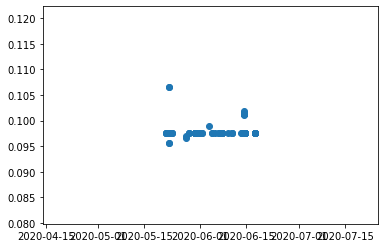

In [5]:
# plt.hist(heighst_residuals['AC_POWER']/heighst_residuals['DC_POWER'])

plt.scatter(heighst_residuals['DATE_TIME'],heighst_residuals['AC_POWER']/heighst_residuals['DC_POWER'])

In [6]:
#anomaly AC residuals during a specific time in a day 
heighst_residuals['DATE_TIME'].value_counts()

2020-06-14 14:00:00    20
2020-06-14 08:30:00    16
2020-05-30 12:00:00    10
2020-06-17 12:15:00     9
2020-06-07 11:15:00     5
2020-05-21 11:15:00     4
2020-05-22 13:00:00     4
2020-06-10 12:00:00     3
2020-05-23 12:15:00     3
2020-06-06 13:00:00     3
2020-05-28 12:15:00     3
2020-05-31 12:45:00     2
2020-06-13 12:00:00     2
2020-06-04 13:00:00     2
2020-05-27 14:45:00     2
2020-05-22 11:30:00     2
2020-06-05 11:45:00     1
2020-05-30 12:30:00     1
2020-06-09 11:00:00     1
2020-06-06 14:15:00     1
2020-06-01 11:15:00     1
2020-06-03 13:45:00     1
2020-06-07 12:00:00     1
2020-06-13 11:45:00     1
2020-05-22 12:00:00     1
2020-06-01 11:30:00     1
Name: DATE_TIME, dtype: int64

In [27]:
merged_df = pd.merge(heighst_residuals, plant_weat, how='inner', on='DATE_TIME')
merged_df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,AC/DC_conversion,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-21 11:15:00,4135001,1IF53ai7Xc0U56Y,13913.57143,1356.600000,3128.142857,6228555.143,1040.182076,0.097502,4135001,HmiyD2TTLFNqkNe,29.597730,56.443897,1.038991
1,2020-05-21 11:15:00,4135001,3PZuoBAID5Wc2HD,13687.12500,1334.387500,3122.000000,7032616.000,1098.179252,0.097492,4135001,HmiyD2TTLFNqkNe,29.597730,56.443897,1.038991
2,2020-05-21 11:15:00,4135001,7JYdWkrLSPkdwr4,13552.62500,1321.375000,3025.125000,7647005.125,1012.190737,0.097500,4135001,HmiyD2TTLFNqkNe,29.597730,56.443897,1.038991
3,2020-05-21 11:15:00,4135001,VHMLBKoKgIrUVDU,13723.12500,1338.012500,3107.750000,7251631.750,1026.484801,0.097501,4135001,HmiyD2TTLFNqkNe,29.597730,56.443897,1.038991
4,2020-05-21 11:15:00,4135001,ZnxXDlPa8U1GXgE,13596.28571,1325.614286,3070.000000,6567115.000,1029.689277,0.097498,4135001,HmiyD2TTLFNqkNe,29.597730,56.443897,1.038991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2020-06-17 12:15:00,4135001,pkci93gMrogZuBj,13869.57143,1352.271429,3152.142857,7412630.143,1059.666731,0.097499,4135001,HmiyD2TTLFNqkNe,28.649095,53.773537,1.031230
142,2020-06-17 12:15:00,4135001,rGa61gmuvPhdLxV,13841.14286,1349.528571,3142.714286,7354089.714,1036.561498,0.097501,4135001,HmiyD2TTLFNqkNe,28.649095,53.773537,1.031230
143,2020-06-17 12:15:00,4135001,uHbuxQJl8lW7ozc,13627.42857,1328.657143,3178.285714,7284213.286,1029.740880,0.097499,4135001,HmiyD2TTLFNqkNe,28.649095,53.773537,1.031230
144,2020-06-17 12:15:00,4135001,wCURE6d3bPkepu2,13692.85714,1335.085714,3140.000000,7025858.000,1006.480145,0.097502,4135001,HmiyD2TTLFNqkNe,28.649095,53.773537,1.031230


<AxesSubplot:>

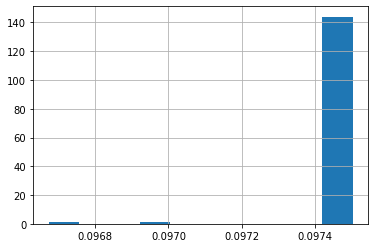

In [34]:
merged_df["AC/DC_conversion"].hist()

<AxesSubplot:>

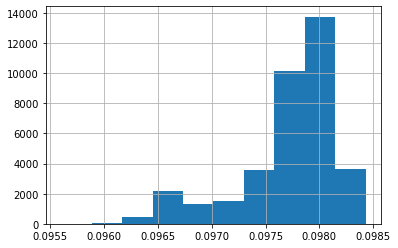

In [36]:
merged_df1["AC/DC_conversion"].hist()

<AxesSubplot:>

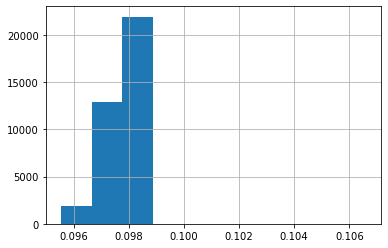

In [35]:
plant_gen["AC/DC_conversion"].hist()

In [32]:
merged_df1 = pd.merge(heighst_residuals1, plant_weat, how='inner', on='DATE_TIME')
merged_df1

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,AC/DC_conversion,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68602,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68603,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68604,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68605,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,7.698297,NaN,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


In [39]:
merged_df[merged_df['DATE_TIME']=='2020-06-14 14:00:00']

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AC/DC_residual,AC/DC_conversion,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
109,2020-06-14 14:00:00,4135001,1IF53ai7Xc0U56Y,14302.71429,1394.514286,5386.285714,6412267.286,1113.006463,0.097500,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
110,2020-06-14 14:00:00,4135001,3PZuoBAID5Wc2HD,14351.12500,1399.225000,5411.000000,7216130.000,1126.324489,0.097499,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
111,2020-06-14 14:00:00,4135001,7JYdWkrLSPkdwr4,14204.00000,1384.871429,5245.857143,7826097.857,1111.360808,0.097499,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
112,2020-06-14 14:00:00,4135001,McdE0feGgRqW7Ca,14418.42857,1405.800000,5298.571429,7387221.571,1127.121419,0.097500,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
113,2020-06-14 14:00:00,4135001,VHMLBKoKgIrUVDU,14299.85714,1394.214286,5374.714286,7434940.714,1127.276944,0.097498,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
114,2020-06-14 14:00:00,4135001,WRmjgnKYAwPKWDb,14116.25000,1376.350000,5339.250000,7252518.250,1075.804864,0.097501,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
115,2020-06-14 14:00:00,4135001,YxYtjZvoooNbGkE,14466.85714,1410.528571,5160.857143,7404599.857,1129.412880,0.097501,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
116,2020-06-14 14:00:00,4135001,ZnxXDlPa8U1GXgE,14273.28571,1391.642857,5264.000000,6749607.000,1110.272459,0.097500,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
117,2020-06-14 14:00:00,4135001,ZoEaEvLYb1n2sOq,14312.71429,1395.485714,5199.000000,7320962.000,1116.875818,0.097500,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652
118,2020-06-14 14:00:00,4135001,adLQvlD726eNBSB,14416.14286,1405.585714,5471.285714,6502967.286,1120.912045,0.097501,4135001,HmiyD2TTLFNqkNe,27.848916,59.386079,1.221652


In [38]:
merged_df['DATE_TIME'].value_counts()

2020-06-14 14:00:00    20
2020-06-17 12:15:00    17
2020-05-30 12:00:00    12
2020-06-07 11:15:00    11
2020-06-10 12:00:00    10
2020-05-21 11:15:00     7
2020-05-23 12:15:00     7
2020-06-13 12:00:00     6
2020-05-31 12:45:00     5
2020-06-13 11:45:00     4
2020-05-28 12:15:00     4
2020-06-04 13:00:00     3
2020-06-07 12:00:00     3
2020-06-09 11:00:00     3
2020-06-01 11:15:00     3
2020-05-30 12:30:00     3
2020-06-05 13:45:00     3
2020-06-06 13:00:00     3
2020-05-22 11:30:00     3
2020-06-01 11:30:00     2
2020-06-06 14:15:00     2
2020-06-05 11:45:00     2
2020-05-23 11:45:00     2
2020-05-27 14:45:00     2
2020-06-07 12:15:00     2
2020-06-07 12:30:00     1
2020-05-22 12:00:00     1
2020-06-03 12:45:00     1
2020-06-05 11:30:00     1
2020-05-21 13:15:00     1
2020-05-31 11:30:00     1
2020-06-03 11:45:00     1
Name: DATE_TIME, dtype: int64

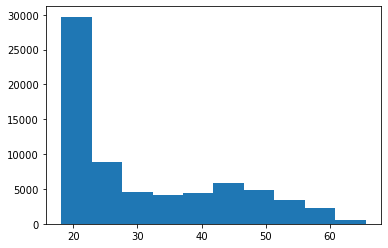

(array([39090.,  4656.,  4374.,  4928.,  4749.,  4509.,  3031.,  2468.,
          756.,    46.]),
 array([0.        , 0.12216518, 0.24433037, 0.36649555, 0.48866074,
        0.61082592, 0.73299111, 0.85515629, 0.97732148, 1.09948666,
        1.22165185]),
 <BarContainer object of 10 artists>)

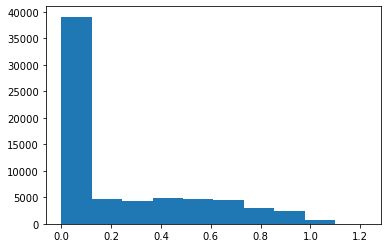

In [33]:
plt.hist(merged_df1['MODULE_TEMPERATURE'])
plt.show()
plt.hist(merged_df1['IRRADIATION'])

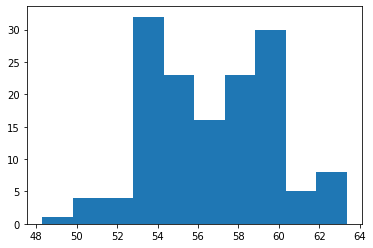

(array([ 2.,  3.,  0.,  0.,  1.,  0., 15., 66., 27., 32.]),
 array([0.36125576, 0.44729537, 0.53333497, 0.61937458, 0.70541419,
        0.7914538 , 0.87749341, 0.96353302, 1.04957263, 1.13561224,
        1.22165185]),
 <BarContainer object of 10 artists>)

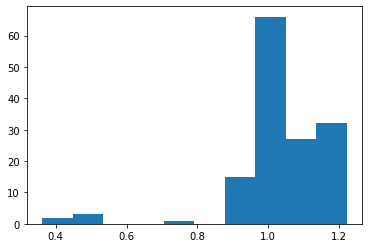

In [28]:
plt.hist(merged_df['MODULE_TEMPERATURE'])
plt.show()
plt.hist(merged_df['IRRADIATION'])



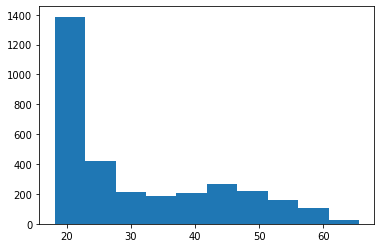

(array([1832.,  212.,  200.,  224.,  216.,  205.,  138.,  113.,   38.,
           4.]),
 array([0.        , 0.12216518, 0.24433037, 0.36649555, 0.48866074,
        0.61082592, 0.73299111, 0.85515629, 0.97732148, 1.09948666,
        1.22165185]),
 <a list of 10 Patch objects>)

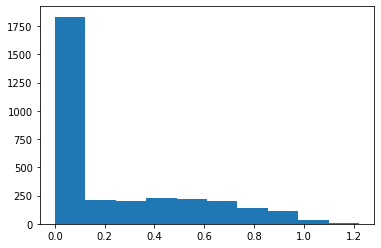

In [9]:
plt.hist(plant_weat['MODULE_TEMPERATURE'])
plt.show()
plt.hist(plant_weat['IRRADIATION'])

In [10]:
# plant_gen['daily_average'] = plant_gen['AC_POWER'].rolling(672).mean()
# for i,group in  plant_gen.groupby('SOURCE_KEY'):
#     plt.plot(group['DATE_TIME'],group['daily_average'])
#     plt.show()
    